# Import the libraries

In [1]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computing
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt # For plotting graphs
import pickle # For saving and loading objects
from scipy import stats # For statistical functions
from sklearn.model_selection import train_test_split # For splitting the data into training and testing sets
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.preprocessing import OrdinalEncoder # For encoding categorical variables as ordinal numbers
from sklearn.preprocessing import OneHotEncoder # For encoding categorical variables as one-hot vectors
from sklearn.pipeline import Pipeline # For creating pipelines of transformations
from sklearn.preprocessing import StandardScaler # For scaling numerical variables
from sklearn.compose import ColumnTransformer # For applying different transformations to different columns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error # For measuring the mean squared error of the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV # For finding the best hyperparameters of the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor # For building a random forest regression model
from sklearn.model_selection import cross_val_score

# Read the data

In [2]:
daiabet = pd.read_csv("daiabet.csv")

In [3]:
daiabet.head(10)

Sex  age  hight  weight  blood sugar  blood pressure  type of diabetes  \
0    male   64    160      90          196            90.6                 2   
1    male   64    175      65          128           110.6                 2   
2    male   55    168      77          211           100.6                 1   
3  female   54    155      84          154           110.5                 2   
4    male   41    173      66          192            90.6                 2   
5  female   43    158      79          178           120.6                 2   
6  female   71    155      73          250           130.8                 1   
7  female   54    167      90          170           120.6                 2   
8    male   59    170      50          200           100.5                 1   
9  female   49    160      54          171           110.6                 1   

           Complications of diabetes  Family history  
0                                eye               1  
1                            Nervous               1  
2                                eye               1  
3                                eye               1  
4                            Nervous               2  
5  Nervous Gastrointestinal and skin               1  
6                                eye               1  
7                             kidney               1  
8                             kidney               1  
9                            Nervous               2

# Take a Quick Look at the Data Structure

In [4]:
daiabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex                        75 non-null     object 
 1   age                        75 non-null     int64  
 2   hight                      75 non-null     int64  
 3   weight                     75 non-null     int64  
 4   blood sugar                75 non-null     int64  
 5   blood pressure             75 non-null     float64
 6   type of diabetes           75 non-null     int64  
 7   Complications of diabetes  75 non-null     object 
 8   Family history             75 non-null     int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 5.4+ KB


In [5]:
daiabet.shape

(75, 9)

In [6]:
daiabet["Sex"].value_counts()

Sex
female    42
male      33
Name: count, dtype: int64

In [7]:
daiabet = daiabet.drop("Complications of diabetes", axis=1)

In [8]:
daiabet.describe()

age       hight      weight  blood sugar  blood pressure  \
count  75.000000   75.000000   75.000000    75.000000       75.000000   
mean   54.173333  162.906667   74.346667   191.946667      122.662667   
std    12.108042    8.235016   11.542511    47.087869       16.563953   
min    15.000000  147.000000   50.000000   128.000000       90.600000   
25%    47.500000  158.000000   67.000000   163.000000      110.700000   
50%    55.000000  160.000000   75.000000   178.000000      120.800000   
75%    63.000000  168.000000   80.000000   216.500000      130.800000   
max    77.000000  192.000000  110.000000   315.000000      160.800000   

       type of diabetes  Family history  
count         75.000000       75.000000  
mean           1.720000        1.426667  
std            0.452022        0.497924  
min            1.000000        1.000000  
25%            1.000000        1.000000  
50%            2.000000        1.000000  
75%            2.000000        2.000000  
max            2.000000        2.000000

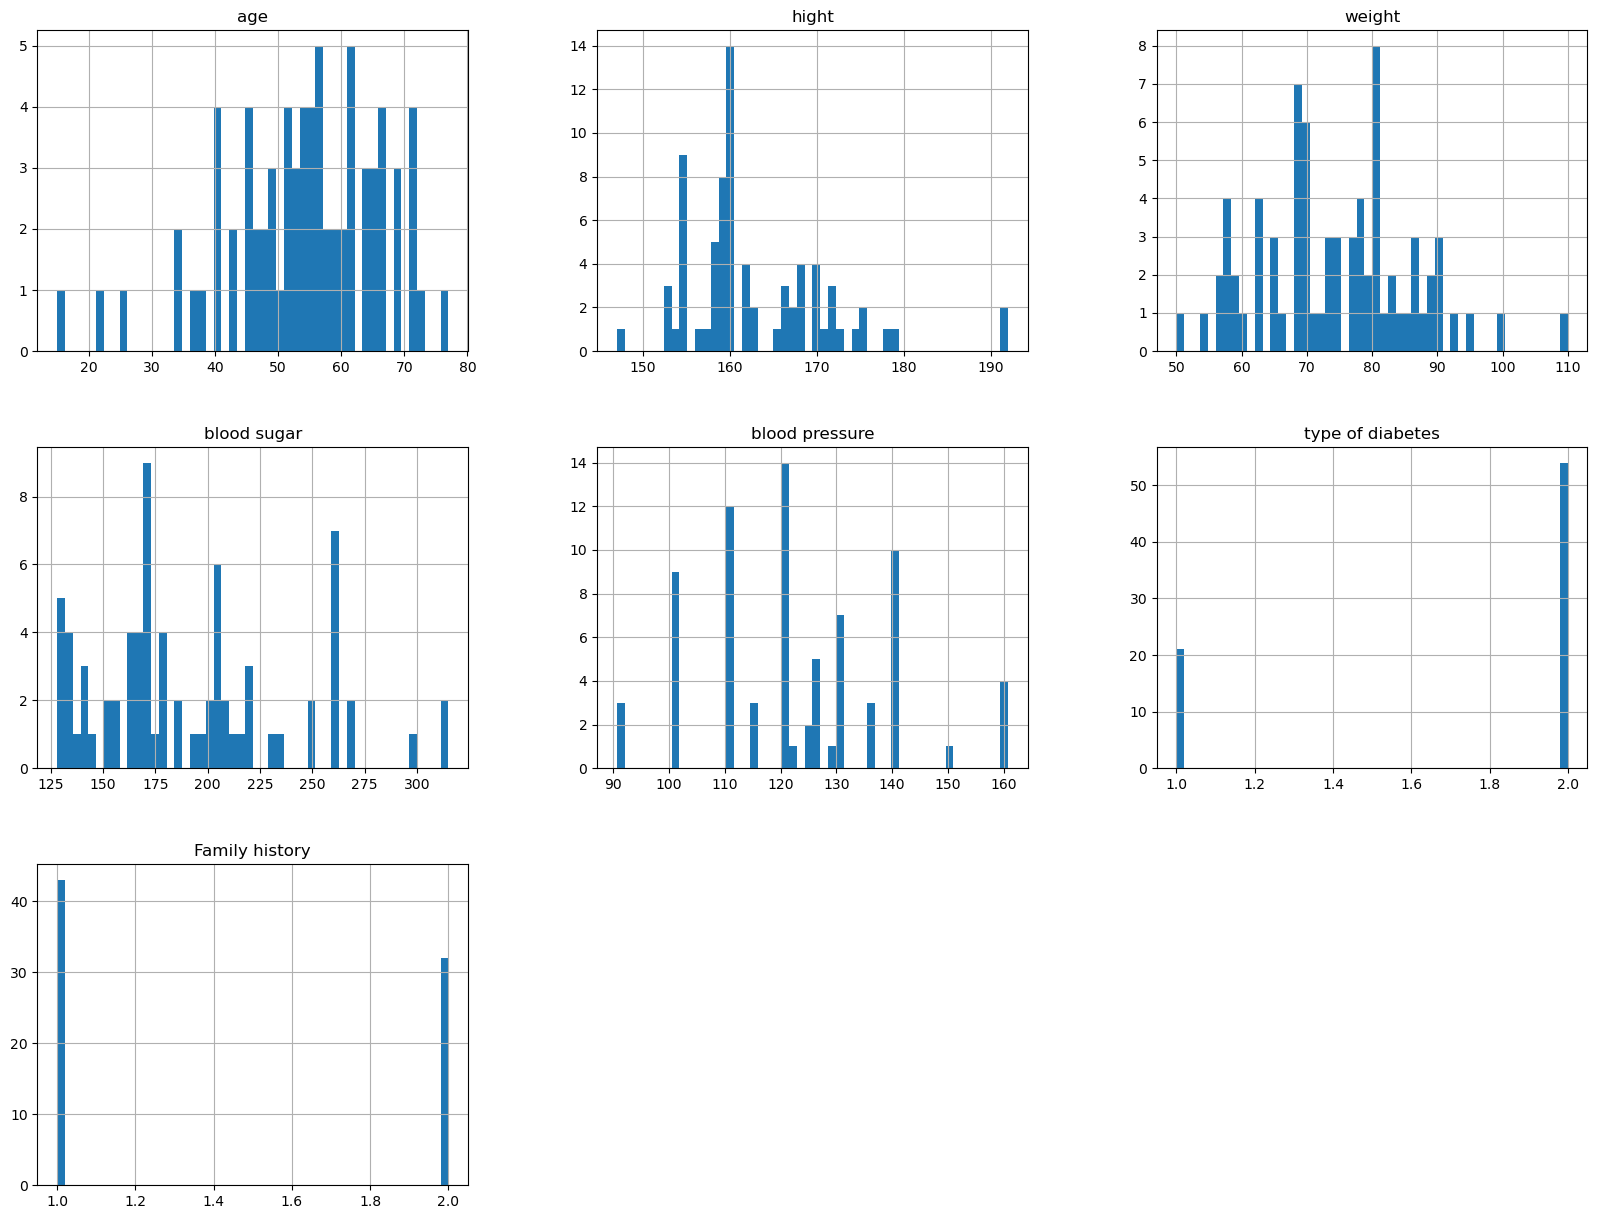

In [9]:
daiabet.hist(bins=50, figsize=(20,15));

In [10]:
daiabet.isnull().sum()

Sex                 0
age                 0
hight               0
weight              0
blood sugar         0
blood pressure      0
type of diabetes    0
Family history      0
dtype: int64

# Create a Test Set

In [11]:
train_set, test_set = train_test_split(daiabet, test_size=0.2, random_state=42) # Split the data into 80% training and 20% testing sets

In [12]:
train_set.shape, test_set.shape

((60, 8), (15, 8))

# Discover and Visualize the Data to Gain Insights

### Visualizing Geographical Data

In [13]:
daiabet = train_set.copy()

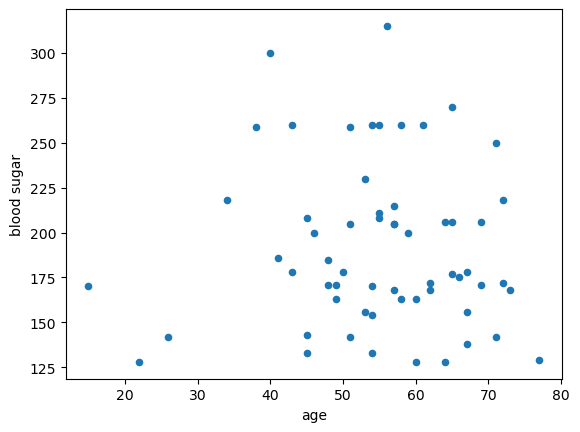

In [14]:
daiabet.plot(kind="scatter", x="age", y="blood sugar");

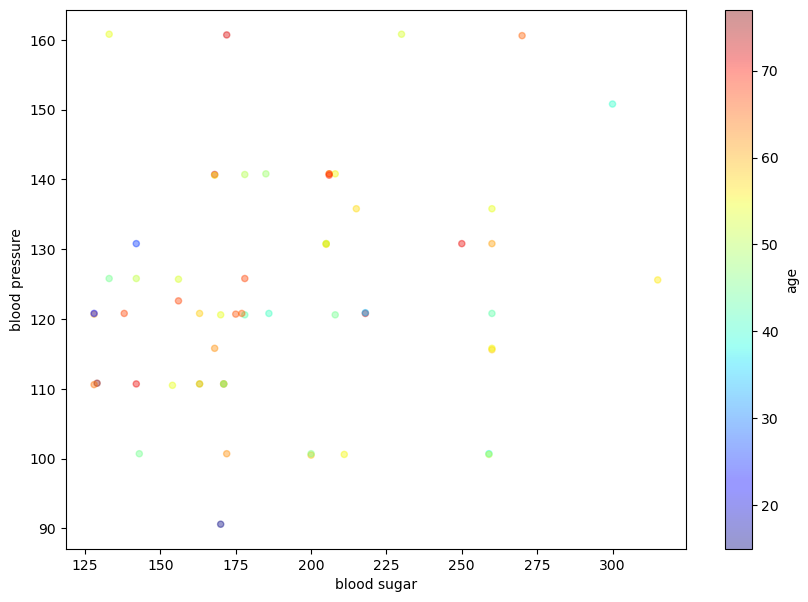

In [15]:
daiabet.plot(kind="scatter", x="blood sugar", y="blood pressure", alpha=0.4, 
             figsize=(10,7), c="age", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False);

### Looking for Correlations

C:\Users\msi3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msi3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msi3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msi3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

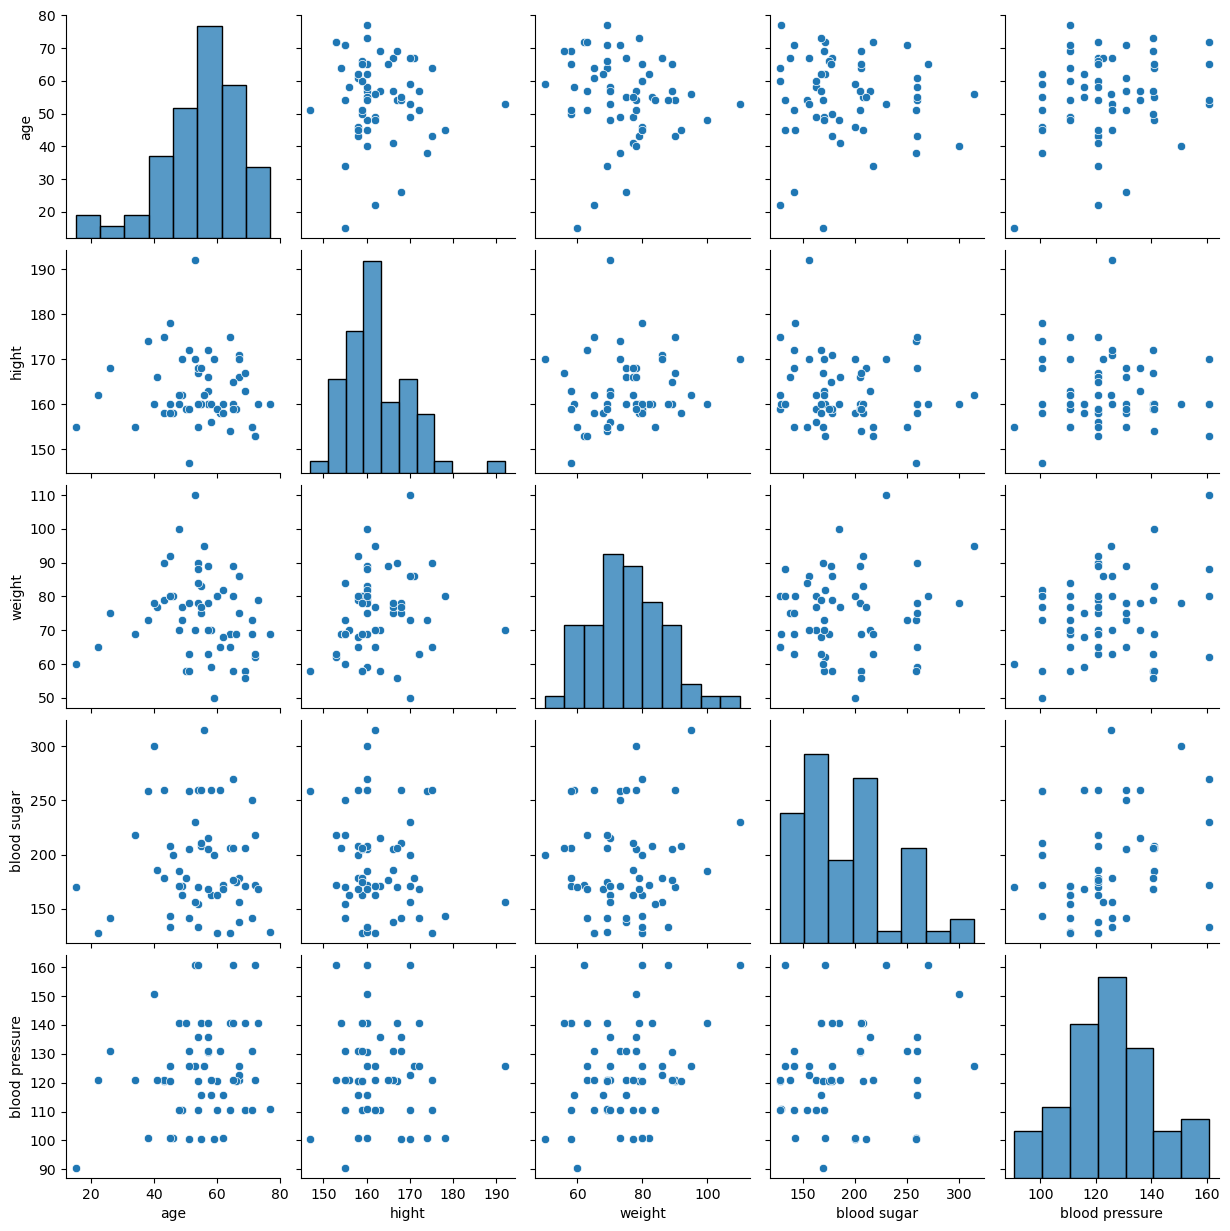

In [16]:
attributes = ["age", "hight", "weight", "blood sugar", "blood pressure"]

sns.pairplot(daiabet[attributes]);

# Prepare the Data for Machine Learning Algorithms

In [17]:
daiabet = train_set.drop(["blood sugar", "type of diabetes"], axis=1) 
daiabet_labels = train_set[["blood sugar", "type of diabetes"]].copy() 

In [18]:
daiabet.head()

Sex  age  hight  weight  blood pressure  Family history
22    male   61    158      65           130.8               1
5   female   43    158      79           120.6               1
33  female   60    159      80           120.7               2
56  female   58    156      70           120.8               1
66    male   69    163      58           110.7               1

In [19]:
daiabet_labels.head()

blood sugar  type of diabetes
22          260                 2
5           178                 2
33          128                 2
56          163                 2
66          171                 2

### Data Cleaning

In [20]:
imputer = SimpleImputer(strategy="median") 

In [21]:
daiabet_num = daiabet.drop("Sex", axis=1)

In [22]:
daiabet_num.head()

age  hight  weight  blood pressure  Family history
22   61    158      65           130.8               1
5    43    158      79           120.6               1
33   60    159      80           120.7               2
56   58    156      70           120.8               1
66   69    163      58           110.7               1

In [23]:
imputer.fit(daiabet_num) 

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([ 55.5, 160. ,  75. , 120.8,   1. ])

In [25]:
daiabet_num.median().values

array([ 55.5, 160. ,  75. , 120.8,   1. ])

In [26]:
X = imputer.transform(daiabet_num) 

In [27]:
X

array([[ 61. , 158. ,  65. , 130.8,   1. ],
       [ 43. , 158. ,  79. , 120.6,   1. ],
       [ 60. , 159. ,  80. , 120.7,   2. ],
       [ 58. , 156. ,  70. , 120.8,   1. ],
       [ 69. , 163. ,  58. , 110.7,   1. ],
       [ 57. , 163. ,  70. , 135.8,   1. ],
       [ 57. , 160. ,  89. , 130.7,   1. ],
       [ 38. , 174. ,  73. , 100.7,   1. ],
       [ 72. , 153. ,  62. , 160.7,   1. ],
       [ 49. , 170. ,  73. , 110.7,   1. ],
       [ 56. , 162. ,  95. , 125.6,   2. ],
       [ 54. , 167. ,  90. , 120.6,   1. ],
       [ 67. , 171. ,  86. , 125.8,   2. ],
       [ 54. , 168. ,  78. , 135.8,   1. ],
       [ 53. , 170. , 110. , 160.8,   1. ],
       [ 64. , 154. ,  69. , 140.8,   2. ],
       [ 67. , 166. ,  75. , 120.8,   1. ],
       [ 15. , 155. ,  60. ,  90.6,   2. ],
       [ 49. , 162. ,  77. , 110.7,   1. ],
       [ 55. , 160. ,  83. , 140.8,   1. ],
       [ 62. , 160. ,  82. , 100.7,   2. ],
       [ 67. , 170. ,  86. , 122.6,   2. ],
       [ 45. , 160. ,  80. , 125

In [28]:
daiabet_tr = pd.DataFrame(X, columns=daiabet_num.columns, index=daiabet_num.index) 

In [29]:
daiabet_tr.head()

age  hight  weight  blood pressure  Family history
22  61.0  158.0    65.0           130.8             1.0
5   43.0  158.0    79.0           120.6             1.0
33  60.0  159.0    80.0           120.7             2.0
56  58.0  156.0    70.0           120.8             1.0
66  69.0  163.0    58.0           110.7             1.0

### Handling Text and Categorical Attributes

In [30]:
daiabet_cat = daiabet[["Sex"]]

In [31]:
daiabet_cat.head()

Sex
22    male
5   female
33  female
56  female
66    male

In [32]:
ordinal_encoder = OrdinalEncoder() # Create an ordinal encoder object
daiabet_cat_encoded = ordinal_encoder.fit_transform(daiabet_cat) # Encode the categorical data as ordinal numbers
daiabet_cat_encoded[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [33]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [34]:
cat_encoder = OneHotEncoder() 
daiabet_cat_1hot = cat_encoder.fit_transform(daiabet_cat) 
daiabet_cat_1hot

daiabet_cat_1hot.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [35]:
cat_encoder = OneHotEncoder(sparse=False) # Create a one-hot encoder object with dense output
daiabet_cat_1hot = cat_encoder.fit_transform(daiabet_cat) # Encode the categorical data as one-hot vectors
daiabet_cat_1hot

C:\Users\msi3\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

### Transformation Pipelines

In [36]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

daiabet_num_tr = num_pipeline.fit_transform(daiabet_num) # Fit and transform the numerical data with the pipeline

In [37]:
num_attribs = list(daiabet_num) # Get the list of numerical attributes
cat_attribs = ["Sex"] # Get the list of categorical attributes

# Create a full pipeline that applies different transformations to different columns
# Apply the numerical pipeline to the numerical attributes
# Apply the one-hot encoder to the categorical attributes
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
daiabet_prepared = full_pipeline.fit_transform(daiabet) # Fit and transform the data with the full pipeline

In [38]:
daiabet_prepared

array([[ 0.49275981, -0.64560642, -0.84032731,  0.42401042, -0.78842985,
         0.        ,  1.        ],
       [-0.96526922, -0.64560642,  0.36629652, -0.20460968, -0.78842985,
         1.        ,  0.        ],
       [ 0.4117582 , -0.51016451,  0.45248394, -0.19844674,  1.26834366,
         1.        ,  0.        ],
       [ 0.24975497, -0.91649023, -0.40939023, -0.1922838 , -0.78842985,
         1.        ,  0.        ],
       [ 1.14077271,  0.03160311, -1.44363923, -0.81474096, -0.78842985,
         0.        ,  1.        ],
       [ 0.16875336,  0.03160311, -0.40939023,  0.73215754, -0.78842985,
         1.        ,  0.        ],
       [ 0.16875336, -0.37472261,  1.22817068,  0.41784748, -0.78842985,
         1.        ,  0.        ],
       [-1.37027728,  1.52146408, -0.15082798, -1.43103518, -0.78842985,
         0.        ,  1.        ],
       [ 1.38377755, -1.32281595, -1.09888956,  2.26673015, -0.78842985,
         1.        ,  0.        ],
       [-0.47925954,  0.9796

In [39]:
daiabet_prepared.shape

(60, 7)

# Select and Train a Model

## LinearRegression

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(daiabet_prepared, daiabet_labels)

LinearRegression()

In [41]:
# let's try the full preprocessing pipeline on a few training instances
some_data = daiabet.iloc[:5] # Get the first five rows of the data
some_labels = daiabet_labels.iloc[:5] # Get the first five labels of the data
some_data_prepared = full_pipeline.transform(some_data) # Transform the data with the full pipeline

In [42]:
some_data.head()

Sex  age  hight  weight  blood pressure  Family history
22    male   61    158      65           130.8               1
5   female   43    158      79           120.6               1
33  female   60    159      80           120.7               2
56  female   58    156      70           120.8               1
66    male   69    163      58           110.7               1

In [43]:
some_labels.head()

blood sugar  type of diabetes
22          260                 2
5           178                 2
33          128                 2
56          163                 2
66          171                 2

In [44]:
print(some_data_prepared[0])

[ 0.49275981 -0.64560642 -0.84032731  0.42401042 -0.78842985  0.
  1.        ]


In [45]:
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", some_labels)

Predictions: [[206.44510964   1.66496972]
 [197.32212398   1.90968367]
 [183.39900026   1.74619528]
 [191.55205289   1.8740085 ]
 [184.04448838   1.59836964]]
Labels:     blood sugar  type of diabetes
22          260                 2
5           178                 2
33          128                 2
56          163                 2
66          171                 2


In [46]:
# Let’s measure this regression model’s RMSE on the whole training set

daiabet_predictions = lin_reg.predict(daiabet_prepared)
lin_rmse = mean_squared_error(daiabet_labels, daiabet_predictions, squared=False)
lin_rmse

21.658387652625876

## DecisionTreeRegressor

In [47]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(daiabet_prepared, daiabet_labels)

DecisionTreeRegressor()

In [48]:
daiabet_predictions = tree_reg.predict(daiabet_prepared)
tree_mse = mean_squared_error(daiabet_labels, daiabet_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [49]:
print("Predictions:", tree_reg.predict(some_data_prepared))
print("Labels:", some_labels)

Predictions: [[260.   2.]
 [178.   2.]
 [128.   2.]
 [163.   2.]
 [171.   2.]]
Labels:     blood sugar  type of diabetes
22          260                 2
5           178                 2
33          128                 2
56          163                 2
66          171                 2


### Better Evaluation Using Cross-Validation

In [50]:
scores = cross_val_score(tree_reg, daiabet_prepared, daiabet_predictions,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [51]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [37.93525186 48.26144079 62.16644325 28.23561581 55.57502437 63.47506072
 52.87248812 73.54590403 30.6906609  35.39067674]
Mean: 48.81485665802436
Standard deviation: 14.552826854482072


In [52]:
print("Predictions:", tree_reg.predict(some_data_prepared))
print("Labels:", some_labels)

Predictions: [[260.   2.]
 [178.   2.]
 [128.   2.]
 [163.   2.]
 [171.   2.]]
Labels:     blood sugar  type of diabetes
22          260                 2
5           178                 2
33          128                 2
56          163                 2
66          171                 2


The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

## RandomForestRegressor

In [53]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(daiabet_prepared, daiabet_labels)
daiabet_predictions = forest_reg.predict(daiabet_prepared)
forest_mse = mean_squared_error(daiabet_labels, daiabet_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11.91109804622003

In [54]:
forest_scores = cross_val_score(forest_reg, daiabet_prepared, daiabet_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [28.60372251 43.71250355 27.01948325 21.1593614  37.54513817 39.27693057
 37.44054465 48.88712109 35.58741257 16.9621176 ]
Mean: 33.61943353520382
Standard deviation: 9.498951938960431


In [55]:
print("Predictions:", forest_reg.predict(some_data_prepared))
print("Labels:", some_labels)

Predictions: [[234.2    1.86]
 [179.2    1.91]
 [144.58   1.94]
 [179.1    1.92]
 [174.97   1.85]]
Labels:     blood sugar  type of diabetes
22          260                 2
5           178                 2
33          128                 2
56          163                 2
66          171                 2


# Fine-Tune The Model

## Grid Search

In [56]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(daiabet_prepared, daiabet_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [58]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [59]:
np.sqrt(-grid_search.best_score_)

34.2137322170824

In [60]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

37.24128036148815 {'max_features': 2, 'n_estimators': 3}
34.787133636829964 {'max_features': 2, 'n_estimators': 10}
34.70270549277849 {'max_features': 2, 'n_estimators': 30}
38.926854483762234 {'max_features': 4, 'n_estimators': 3}
34.40773047829029 {'max_features': 4, 'n_estimators': 10}
34.2137322170824 {'max_features': 4, 'n_estimators': 30}
37.061422990409774 {'max_features': 6, 'n_estimators': 3}
35.289345653704984 {'max_features': 6, 'n_estimators': 10}
35.28666060520132 {'max_features': 6, 'n_estimators': 30}
38.0935495657535 {'max_features': 8, 'n_estimators': 3}
35.57910084117735 {'max_features': 8, 'n_estimators': 10}
35.89616726161825 {'max_features': 8, 'n_estimators': 30}
36.33476042049562 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
37.058088410853934 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
39.555797439959555 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
37.46158031904154 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [61]:
print("Predictions:", grid_search.predict(some_data_prepared))
print("Labels:", some_labels)

Predictions: [[226.03333333   1.8       ]
 [183.5          1.93333333]
 [144.16666667   1.93333333]
 [179.83333333   1.93333333]
 [179.53333333   1.83333333]]
Labels:     blood sugar  type of diabetes
22          260                 2
5           178                 2
33          128                 2
56          163                 2
66          171                 2


## Randomized Search

In [62]:
# Define the parameter distributions for the random search
# Randomly choose 10 values for the number of trees
# Randomly choose 10 values for the number of features
param_distribs = {
        'n_estimators': np.random.randint(1, 200, 10),
        'max_features': np.random.randint(1, 8, 10),
    }

forest_reg = RandomForestRegressor(random_state=42) # Create a random forest regression model
# Create a randomized search object
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42) # Set the number of iterations, cross-validation folds, scoring metric, and random state
rnd_search.fit(daiabet_prepared, daiabet_labels) # Fit the randomized search to the prepared data and labels

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': array([1, 7, 6, 5, 5, 4, 1, 5, 7, 4]),
                                        'n_estimators': array([ 22, 125,  42, 149, 196,   2, 119,  73,  86, 169])},
                   random_state=42, scoring='neg_mean_squared_error')

In [63]:
cvres = rnd_search.cv_results_ # Get the cross-validation results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): # For each score and parameter combination
    print(np.sqrt(-mean_score), params) # Print the root mean squared error and the parameters

35.11310794039055 {'n_estimators': 149, 'max_features': 7}
34.54141269045134 {'n_estimators': 149, 'max_features': 4}
33.95763697337356 {'n_estimators': 22, 'max_features': 5}
40.016038451267676 {'n_estimators': 2, 'max_features': 5}
34.68968670916885 {'n_estimators': 196, 'max_features': 5}
34.63812278945778 {'n_estimators': 169, 'max_features': 5}
35.358541939611115 {'n_estimators': 42, 'max_features': 6}
35.370963786714974 {'n_estimators': 22, 'max_features': 7}
35.370963786714974 {'n_estimators': 22, 'max_features': 7}
32.75403078048786 {'n_estimators': 22, 'max_features': 1}


In [64]:
np.sqrt(-rnd_search.best_score_) # Print the best root mean squared error

32.75403078048786

In [65]:
print("Predictions:", rnd_search.predict(some_data_prepared))
print("Labels:", some_labels)

Predictions: [[222.90909091   1.81818182]
 [182.90909091   1.95454545]
 [144.72727273   1.95454545]
 [185.59090909   1.90909091]
 [170.95454545   1.90909091]]
Labels:     blood sugar  type of diabetes
22          260                 2
5           178                 2
33          128                 2
56          163                 2
66          171                 2


# Analyze the Best Models and Their Errors

In [66]:
feature_importances = rnd_search.best_estimator_.feature_importances_ # Get the feature importances of the best model
feature_importances # Print the feature importances

array([0.23694832, 0.16977297, 0.24116584, 0.25915252, 0.0344973 ,
       0.03138617, 0.02707688])

In [67]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2591525184779561, 'blood pressure'),
 (0.2411658425593092, 'weight'),
 (0.23694832323480555, 'age'),
 (0.1697729657653371, 'hight'),
 (0.034497296980440115, 'Family history'),
 (0.03138617247648433, 'female'),
 (0.027076880505667485, 'male')]

# Evaluate Your System on the Test Set

In [68]:
final_model = rnd_search.best_estimator_ # Get the final model from the randomized search

X_test = test_set.drop(["blood sugar", "type of diabetes"], axis=1) # Drop the blood sugar and type of diabetes value column from the test set
y_test = test_set[["blood sugar", "type of diabetes"]].copy() # Copy the blood sugar and type of diabetes value column as the test labels

X_test_prepared = full_pipeline.transform(X_test) # Transform the test set with the full pipeline
final_predictions = final_model.predict(X_test_prepared) # Predict the test labels with the final model

final_mse = mean_squared_error(y_test, final_predictions) # Compute the mean squared error of the final predictions
final_rmse = np.sqrt(final_mse) # Compute the root mean squared error of the final predictions

In [69]:
final_rmse # Print the final root mean squared error

35.47853888991323

In [70]:
confidence = 0.95 # Define the confidence level for the interval estimate
squared_errors = (final_predictions - y_test) ** 2 # Compute the squared errors of the final predictions
# Compute the interval estimate of the root mean squared error
# Use the mean of the squared errors as the location parameter
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors))) # Use the standard error of the mean of the squared errors as the scale parameter

array([[21.79984709,  0.35362117],
       [67.52130161,  0.64987306]])

# Extra material

### A full pipeline with both preparation and prediction

In [71]:
# Create a full pipeline that includes both the preparation and the prediction steps
# Use the full pipeline defined earlier as the preparation step
# Use the final model obtained from the randomized search as the prediction step
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("model", final_model)
    ])

full_pipeline_with_predictor.fit(daiabet, daiabet_labels) # Fit the full pipeline to the data and labels
full_pipeline_with_predictor.predict(some_data) # Print the predictions of the full pipeline on some data

array([[222.90909091,   1.81818182],
       [182.90909091,   1.95454545],
       [144.72727273,   1.95454545],
       [185.59090909,   1.90909091],
       [170.95454545,   1.90909091]])

### Saving the model

In [72]:
my_model = full_pipeline_with_predictor # Assign the full pipeline to a variable called my_model

In [73]:
my_model # Print the my_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hight', 'weight',
                                                   'blood pressure',
                                                   'Family history']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex'])])),
                ('model',
                 RandomForestRegressor(max_features=1, n_estimators=22,
                                       random_state=42))])

In [74]:
print("Predictions:", my_model.predict(some_data))
print("Labels:", some_labels)

Predictions: [[222.90909091   1.81818182]
 [182.90909091   1.95454545]
 [144.72727273   1.95454545]
 [185.59090909   1.90909091]
 [170.95454545   1.90909091]]
Labels:     blood sugar  type of diabetes
22          260                 2
5           178                 2
33          128                 2
56          163                 2
66          171                 2


In [75]:
# Save the trained model to a .pkl file
with open("my_model.pkl", 'wb') as file: # Open a file in write binary mode
    pickle.dump(my_model, file) # Dump the my_model variable to the file using pickle

In [76]:
# Load the model from the .pkl file
with open("my_model.pkl", 'rb') as file: # Open a file in read binary mode
    my_model_loaded = pickle.load(file) # Load the my_model variable from the file using pickle

In [77]:
my_model_loaded.predict(some_data)  # Print the predictions of the loaded model on some data

array([[222.90909091,   1.81818182],
       [182.90909091,   1.95454545],
       [144.72727273,   1.95454545],
       [185.59090909,   1.90909091],
       [170.95454545,   1.90909091]])

In [78]:
some_labels.head()

blood sugar  type of diabetes
22          260                 2
5           178                 2
33          128                 2
56          163                 2
66          171                 2